In [ ]:

 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/EEG_dataset/dataset

ls: cannot access '/content/drive/MyDrive/EEG_dataset/dataset': No such file or directory


In [ ]:
!ls /content/drive/MyDrive/EEG_dataset/ADHD_ERPs

average_signal_participant_10.0.mat  average_signal_participant_31.0.mat
average_signal_participant_1.0.mat   average_signal_participant_32.0.mat
average_signal_participant_11.0.mat  average_signal_participant_33.0.mat
average_signal_participant_12.0.mat  average_signal_participant_34.0.mat
average_signal_participant_13.0.mat  average_signal_participant_35.0.mat
average_signal_participant_14.0.mat  average_signal_participant_36.0.mat
average_signal_participant_15.0.mat  average_signal_participant_37.0.mat
average_signal_participant_16.0.mat  average_signal_participant_38.0.mat
average_signal_participant_17.0.mat  average_signal_participant_39.0.mat
average_signal_participant_18.0.mat  average_signal_participant_40.0.mat
average_signal_participant_19.0.mat  average_signal_participant_4.0.mat
average_signal_participant_20.0.mat  average_signal_participant_41.0.mat
average_signal_participant_2.0.mat   average_signal_participant_42.0.mat
average_signal_participant_21.0.mat  average_signal_

In [ ]:
!ls /content/drive/MyDrive/EEG_dataset/CONTROL_ERPs

average_signal_participant_control_10.mat  average_signal_participant_control_30.mat
average_signal_participant_control_11.mat  average_signal_participant_control_31.mat
average_signal_participant_control_12.mat  average_signal_participant_control_32.mat
average_signal_participant_control_13.mat  average_signal_participant_control_33.mat
average_signal_participant_control_14.mat  average_signal_participant_control_34.mat
average_signal_participant_control_15.mat  average_signal_participant_control_35.mat
average_signal_participant_control_16.mat  average_signal_participant_control_36.mat
average_signal_participant_control_17.mat  average_signal_participant_control_37.mat
average_signal_participant_control_18.mat  average_signal_participant_control_38.mat
average_signal_participant_control_19.mat  average_signal_participant_control_39.mat
average_signal_participant_control_1.mat   average_signal_participant_control_3.mat
average_signal_participant_control_20.mat  average_signal_particip

Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_2.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_3.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_4.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_5.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_6.0.mat: dict_keys(['__header__', '__version__', '_

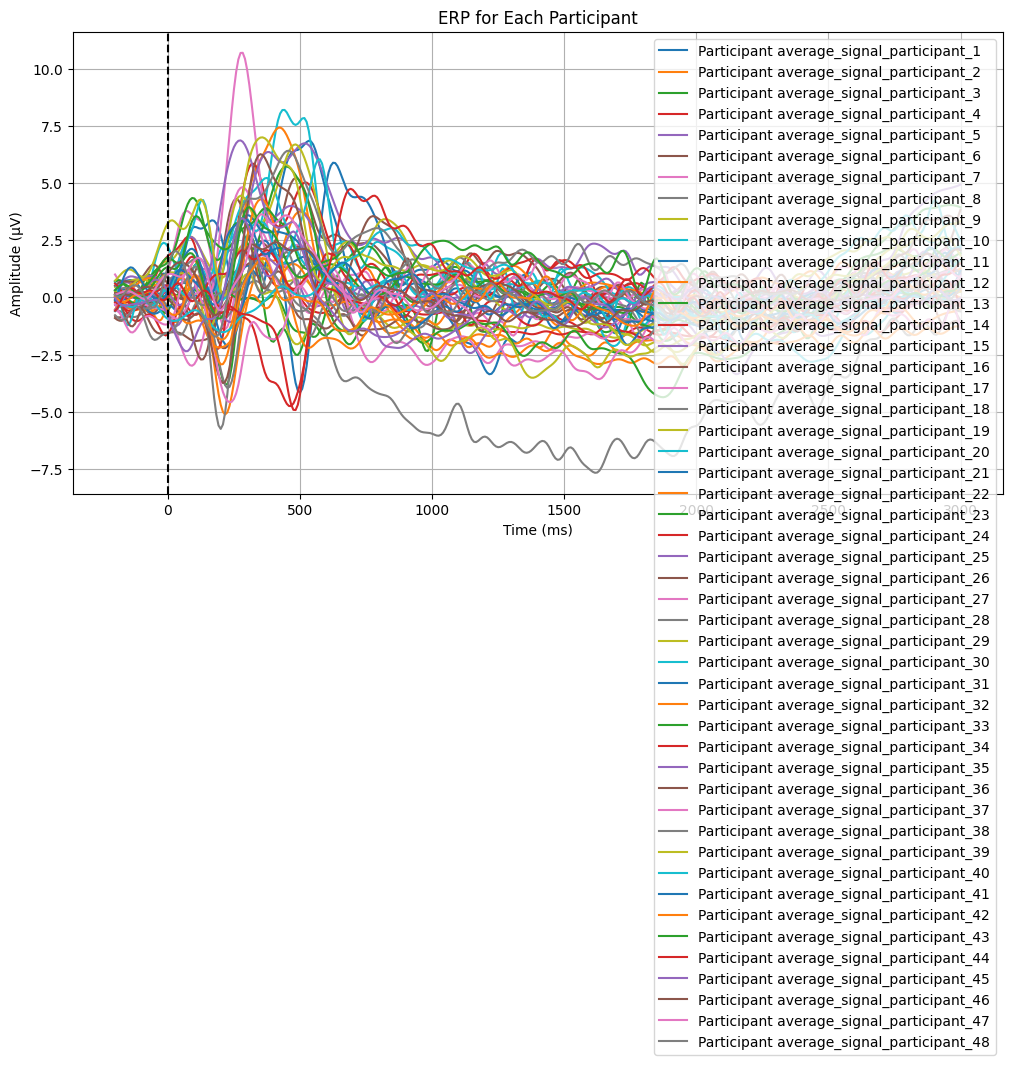

In [ ]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Path to the directory containing the ERP files
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs'

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    # Print the keys to inspect the structure of the data
    print(f"Keys in the file {file_path}: {mat_data.keys()}")

    # Assuming the data for ERP is under the key 'average_signal' (adjust based on your file structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# List all .mat files in the folder
file_names = [f for f in os.listdir(folder_path) if f.endswith('.mat')]

# Assuming each participant has a separate .mat file
participant_data = {}

# Load ERP data for each participant
for file_name in file_names:
    participant_id = file_name.split('.')[0]  # Assuming the participant ID is part of the file name
    file_path = os.path.join(folder_path, file_name)

    # Load ERP data for this participant
    eeg_data = load_mat_data(file_path)

    # Store the data for this participant
    participant_data[participant_id] = eeg_data

# Plot ERP for each participant
def plot_erp(participant_data, time_vector):
    plt.figure(figsize=(12, 6))
    for participant_id, data in participant_data.items():
        # Average across channels (if needed)
        avg_erp = np.mean(data, axis=0)  # Shape (n_time_points,)
        plt.plot(time_vector, avg_erp, label=f'Participant {participant_id}')

    plt.axvline(x=0, color='k', linestyle='--')  # Stimulus onset at 0 ms
    plt.title("ERP for Each Participant")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (µV)")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Time vector, adjust this as per your data
time_vector = np.linspace(-200, 3000, 385)  # Match the number of time points in EEG data

# Call the function to plot the ERPs
plot_erp(participant_data, time_vector)


Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_2.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_3.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_4.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_5.0.mat: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Keys in the file /content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_6.0.mat: dict_keys(['__header__', '__version__', '_

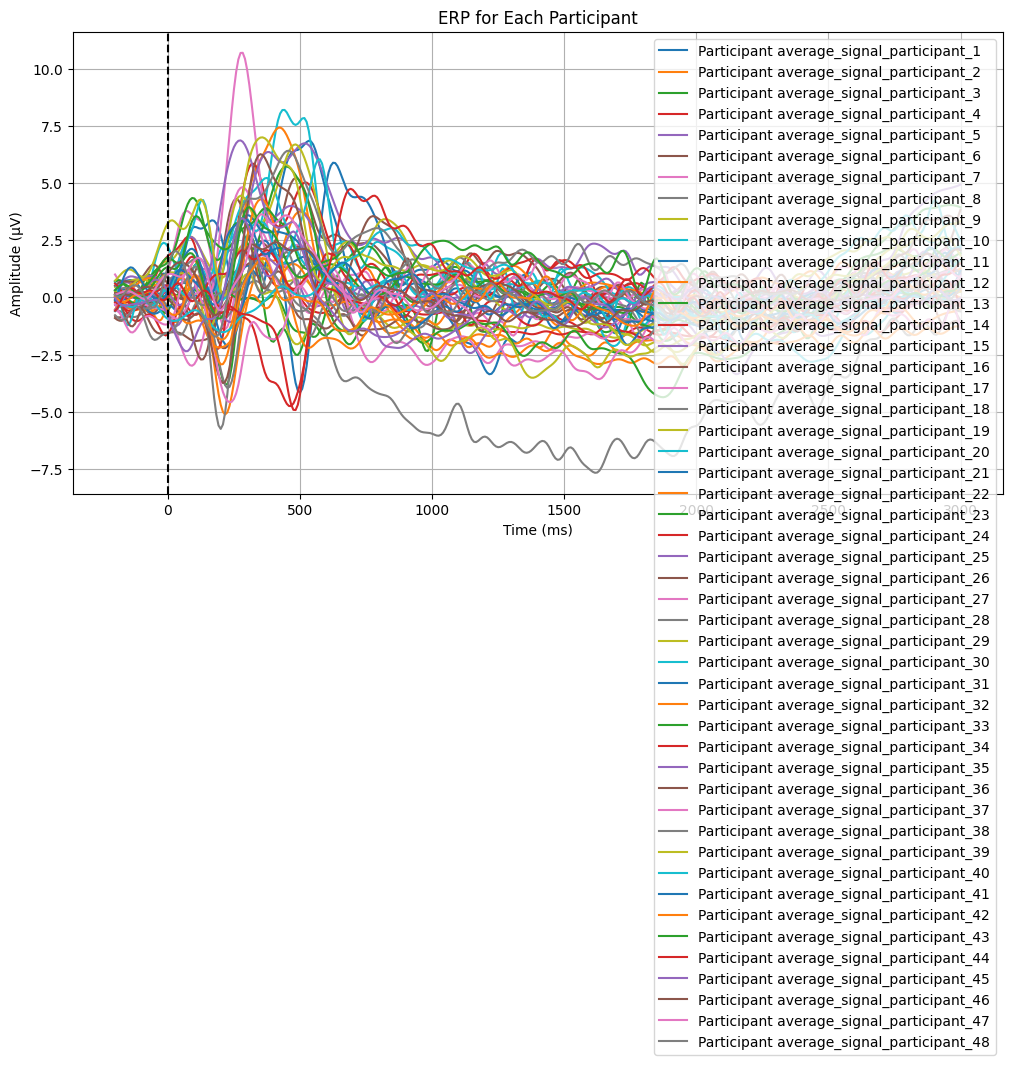

In [ ]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Path to the directory containing the ERP files
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs'

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    # Print the keys to inspect the structure of the data
    print(f"Keys in the file {file_path}: {mat_data.keys()}")

    # Assuming the data for ERP is under the key 'average_signal' (adjust based on your file structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# List all .mat files in the folder
file_names = [f for f in os.listdir(folder_path) if f.endswith('.mat')]

# Assuming each participant has a separate .mat file
participant_data = {}

# Load ERP data for each participant
for file_name in file_names:
    participant_id = file_name.split('.')[0]  # Assuming the participant ID is part of the file name
    file_path = os.path.join(folder_path, file_name)

    # Load ERP data for this participant
    eeg_data = load_mat_data(file_path)

    # Store the data for this participant
    participant_data[participant_id] = eeg_data

# Plot ERP for each participant
def plot_erp(participant_data):
    plt.figure(figsize=(12, 6))

    for participant_id, data in participant_data.items():
        # Average across channels (if needed)
        avg_erp = np.mean(data, axis=0)  # Shape (n_time_points,)

        # Ensure time vector has the same length as eeg_data
        time_vector = np.linspace(-200, 3000, avg_erp.shape[0])  # Adjust time_vector to match the length of avg_erp

        plt.plot(time_vector, avg_erp, label=f'Participant {participant_id}')

    plt.axvline(x=0, color='k', linestyle='--')  # Stimulus onset at 0 ms
    plt.title("ERP for Each Participant")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (µV)")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Call the function to plot the ERPs
plot_erp(participant_data)


In [ ]:
import scipy.io as sio

# Load the .mat file
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'
mat_data = sio.loadmat(file_path)

# Print the keys to inspect the variable names in the .mat file
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])


In [ ]:
import scipy.io as sio

# Path to the .mat file of a specific participant
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'  # Adjust the path accordingly

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    # Print the keys to inspect the structure of the data
    print(f"Keys in the file: {mat_data.keys()}")

    # Assuming the data for ERP is under the key 'average_signal' (adjust based on your file structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Load ERP data for this specific participant
eeg_data = load_mat_data(file_path)

# Print the shape of the data
print(f"Shape of the ERP data for this participant: {eeg_data.shape}")


Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Shape of the ERP data for this participant: (56, 385)


Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Shape of the ERP data for this participant: (56, 385)


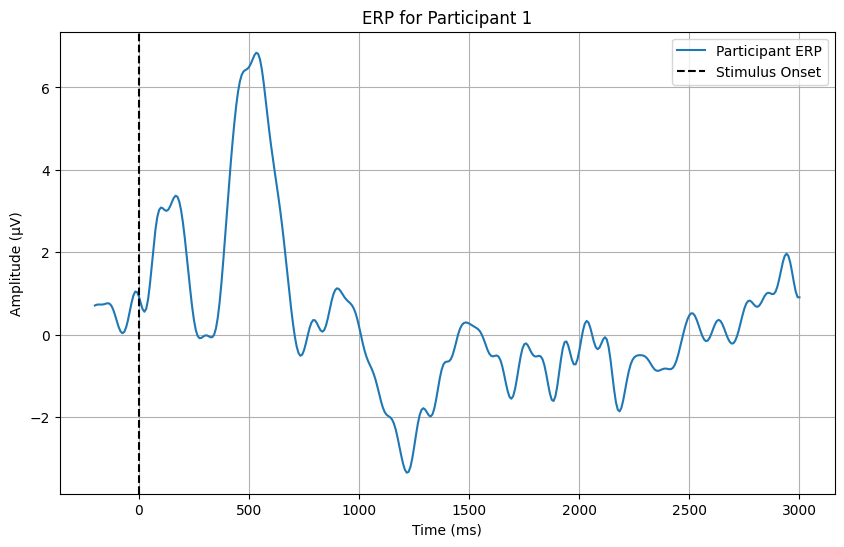

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio

# Path to the .mat file of a specific participant
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'  # Adjust the path accordingly

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Load ERP data for this specific participant
eeg_data = load_mat_data(file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# If you have multiple channels, average the data across channels
avg_erp = eeg_data.mean(axis=0)  # Average across all channels (if the shape is (n_channels, n_time_points))

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# Plot the ERP for this participant
plt.figure(figsize=(10, 6))
plt.plot(time_vector, avg_erp, label=f'Participant ERP')

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Add labels and title
plt.title("ERP for Participant 1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Shape of the ERP data for this participant: (56, 385)


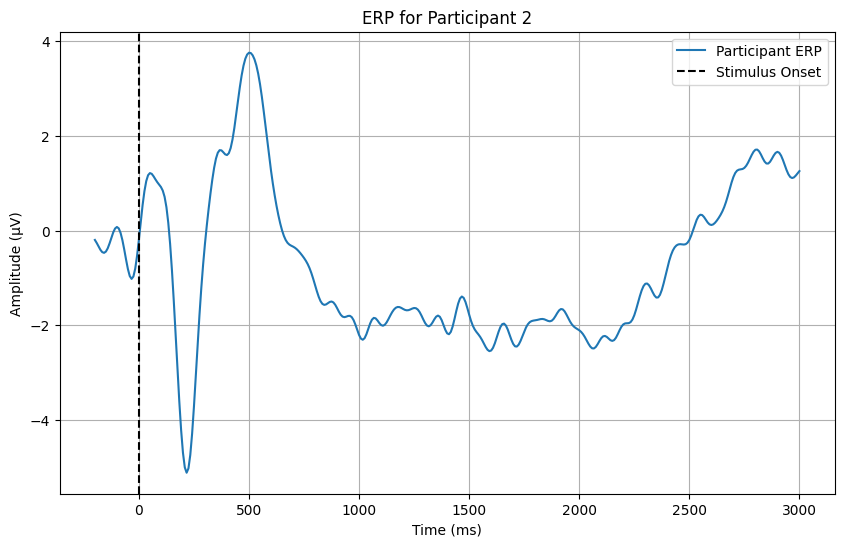

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio

# Path to the .mat file of a specific participant
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_2.0.mat'  # Adjust the path accordingly

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Load ERP data for this specific participant
eeg_data = load_mat_data(file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# If you have multiple channels, average the data across channels
avg_erp = eeg_data.mean(axis=0)  # Average across all channels (if the shape is (n_channels, n_time_points))

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# Plot the ERP for this participant
plt.figure(figsize=(10, 6))
plt.plot(time_vector, avg_erp, label=f'Participant ERP')

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Add labels and title
plt.title("ERP for Participant 2")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

# Folder path containing the participant data files
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Iterate over all files in the folder and plot the ERP for each participant
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Print the shape of the data to understand its structure
        print(f"Shape of the ERP data for {filename}: {eeg_data.shape}")

        # Average across channels (if needed)
        avg_erp = eeg_data.mean(axis=0)  # Average across channels (if the shape is (n_channels, n_time_points))

        # Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Plot the ERP for this participant
        plt.figure(figsize=(10, 6))
        plt.plot(time_vector, avg_erp, label=f'Participant ERP ({filename})')

        # Add stimulus onset line at 0 ms
        plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

        # Add labels and title
        plt.title(f"ERP for {filename}")
        plt.xlabel("Time (ms)")
        plt.ylabel("Amplitude (µV)")
        plt.legend(loc='upper right')
        plt.grid(True)

        # Display the plot
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Shape of the ERP data for this participant: (56, 385)


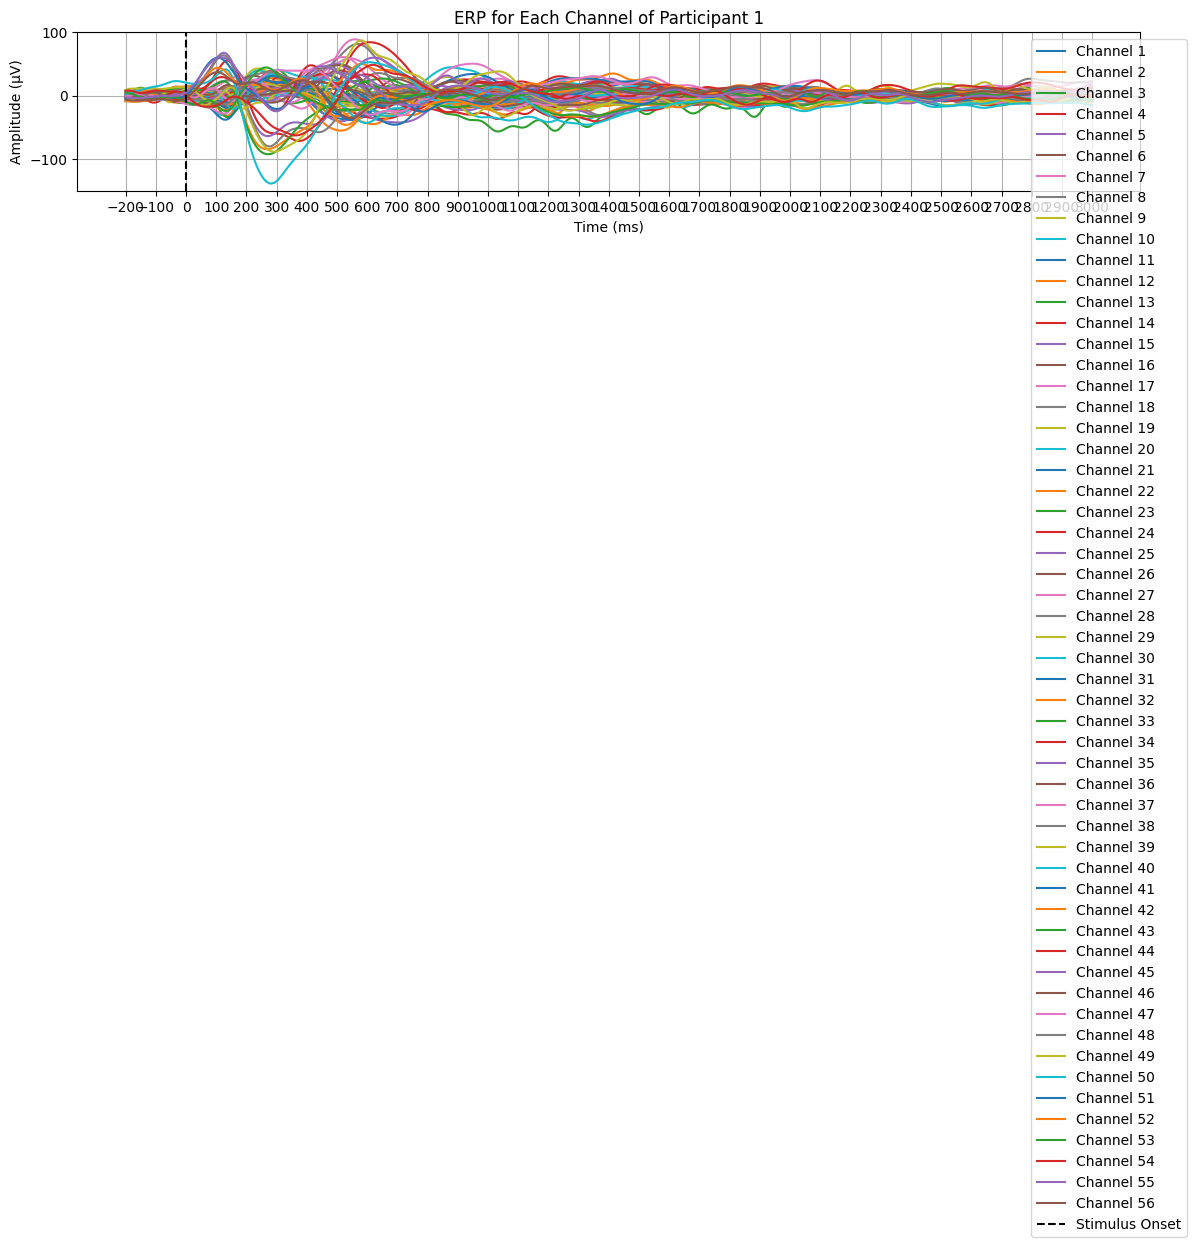

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Path to the .mat file of a specific participant
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'  # Adjust the path accordingly

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Load ERP data for this specific participant
eeg_data = load_mat_data(file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# Plot ERP for each channel
plt.figure(figsize=(12, 8))

# Loop through each channel and plot its ERP
for channel_idx in range(eeg_data.shape[0]):  # Loop over channels
    channel_erp = eeg_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, channel_erp, label=f'Channel {channel_idx + 1}')  # Plot ERP for the channel

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Set custom x-axis ticks (e.g., every 100 ms from -200 to 3000 ms)
x_ticks = np.arange(-200, 3100, 100)  # Define the range and step size for ticks
plt.xticks(x_ticks)

# Add labels and title
plt.title("ERP for Each Channel of Participant 1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (\u00b5V)")
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import scipy.io as sio
# import numpy as np

# # Path to the .mat file of a specific participant
# file_path = '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_1.0.mat'  # Adjust the path accordingly

# # Function to load data from a .mat file
# def load_mat_data(file_path):
#     mat_data = sio.loadmat(file_path)
#     print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
#     # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
#     eeg_data = mat_data['average_signal']  # Adjust this key based on your data
#     return eeg_data

# # Load ERP data for this specific participant
# eeg_data = load_mat_data(file_path)

# # Print the shape of the data to understand its structure
# print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# # Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
# time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# # Plot ERP for each channel
# plt.figure(figsize=(12, 8))

# # Loop through each channel and plot its ERP
# for channel_idx in range(eeg_data.shape[0]):  # Loop over channels
#     channel_erp = eeg_data[channel_idx, :]  # Extract ERP for the current channel
#     plt.plot(time_vector, channel_erp, label=f'Channel {channel_idx + 1}')  # Plot ERP for the channel

# # Add stimulus onset line at 0 ms
# plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# # Set custom x-axis ticks (e.g., every 100 ms from -200 to 3000 ms)
# x_ticks = np.arange(-200, 3100, 100)  # Define the range and step size for ticks
# plt.xticks(x_ticks)

# # Add labels and title
# plt.title("ERP for Each Channel of Participant 1")
# plt.xlabel("Time (ms)")
# plt.ylabel("Amplitude (\u00b5V)")
# plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))  # Place the legend outside the plot
# plt.grid(True)
# plt.tight_layout()  # Adjust layout to prevent clipping
# plt.show()


Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Shape of the ERP data for this participant: (56, 385)


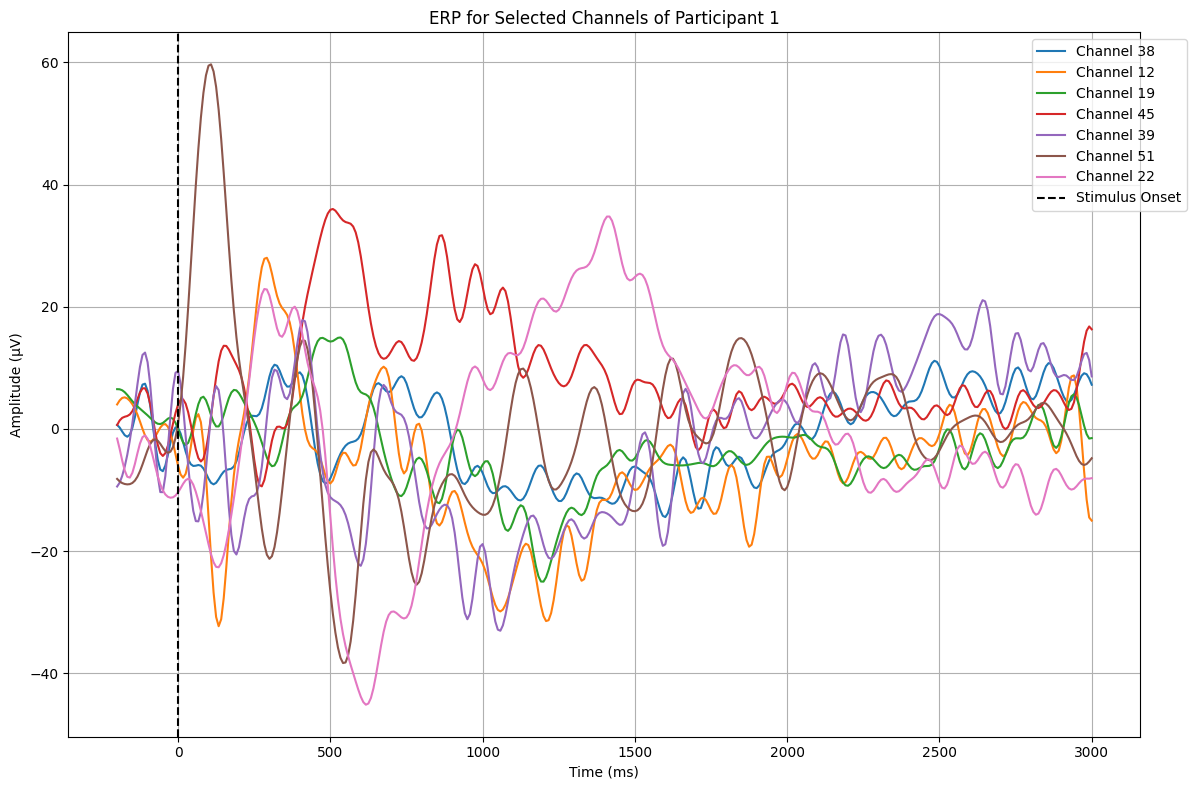

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Path to the .mat file of a specific participant
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'  # Adjust the path accordingly

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Load ERP data for this specific participant
eeg_data = load_mat_data(file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# Channels to plot (1-based indexing)
selected_channels = [38, 12, 19, 45, 39, 51, 22]

# Convert 1-based indices to 0-based indices for Python
selected_indices = [channel - 1 for channel in selected_channels]

# Plot ERP for the selected channels
plt.figure(figsize=(12, 8))

# Loop through selected channel indices and plot each
for channel_idx in selected_indices:
    channel_erp = eeg_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, channel_erp, label=f'Channel {channel_idx + 1}')  # Use original 1-based index in label

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Add labels and title
plt.title("ERP for Selected Channels of Participant 1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Shape of the ERP data for this participant: (56, 385)


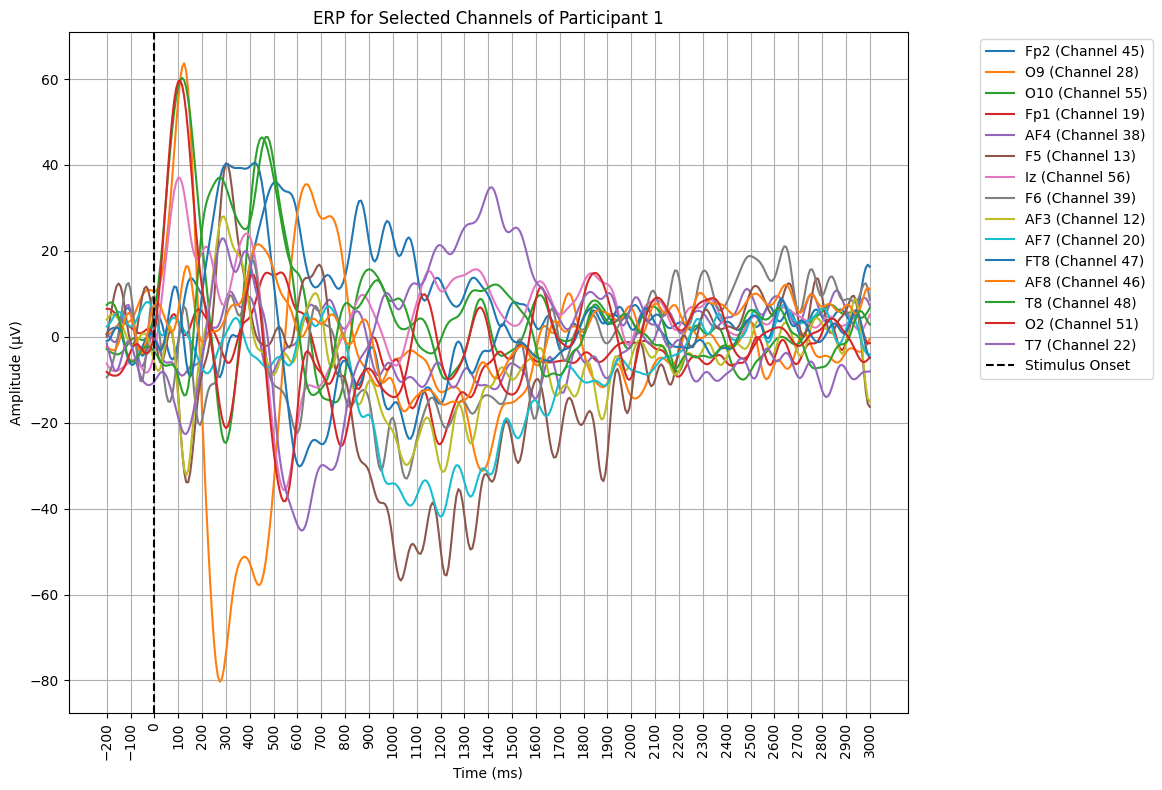

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Path to the .mat file of a specific participant
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'  # Adjust the path accordingly

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Load ERP data for this specific participant
eeg_data = load_mat_data(file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# Channels to plot (1-based indexing) with corresponding labels
selected_channels = {
    45: "Fp2", 28: "O9", 55: "O10", 19: "Fp1", 38: "AF4",
    13: "F5", 56: "Iz", 39: "F6", 12: "AF3", 20: "AF7",
    47: "FT8", 46: "AF8", 48: "T8", 51: "O2", 22: "T7"
}

# Convert 1-based indices to 0-based indices for Python
selected_indices = {channel - 1: label for channel, label in selected_channels.items()}

# Plot ERP for the selected channels
plt.figure(figsize=(12, 8))

# Loop through selected channel indices and plot each
for channel_idx, label in selected_indices.items():
    channel_erp = eeg_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, channel_erp, label=f'{label} (Channel {channel_idx + 1})')  # Use original 1-based index in label

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Adjust x-axis scale to show ticks at 100 ms intervals
plt.xticks(np.arange(-200, 3100, 100), rotation=90)  # Set ticks from -200 to 3000 ms and rotate them vertically

# Add labels and title
plt.title("ERP for Selected Channels of Participant 1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import scipy.io as sio
# import numpy as np

# # Path to the .mat file of a specific participant
# file_path = '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_1.0.mat'  # Adjust the path accordingly

# # Function to load data from a .mat file
# def load_mat_data(file_path):
#     mat_data = sio.loadmat(file_path)
#     print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
#     # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
#     eeg_data = mat_data['average_signal']  # Adjust this key based on your data
#     return eeg_data

# # Load ERP data for this specific participant
# eeg_data = load_mat_data(file_path)

# # Print the shape of the data to understand its structure
# print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# # Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
# time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# # Channels to plot (1-based indexing) with corresponding labels
# selected_channels = {
#     45: "Fp2", 28: "O9", 55: "O10", 19: "Fp1", 38: "AF4",
#     13: "F5", 56: "Iz", 39: "F6", 12: "AF3", 20: "AF7",
#     47: "FT8", 46: "AF8", 48: "T8", 51: "O2", 22: "T7"
# }

# # Convert 1-based indices to 0-based indices for Python
# selected_indices = {channel - 1: label for channel, label in selected_channels.items()}

# # Plot ERP for the selected channels
# plt.figure(figsize=(12, 8))

# # Loop through selected channel indices and plot each
# for channel_idx, label in selected_indices.items():
#     channel_erp = eeg_data[channel_idx, :]  # Extract ERP for the current channel
#     plt.plot(time_vector, channel_erp, label=f'{label} (Channel {channel_idx + 1})')  # Use original 1-based index in label

# # Add stimulus onset line at 0 ms
# plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# # Adjust x-axis scale to show ticks at 100 ms intervals
# plt.xticks(np.arange(-200, 3100, 100))  # Set ticks from -200 to 3000 ms at intervals of 100 ms

# # Add labels and title
# plt.title("ERP for Selected Channels of Participant 1")
# plt.xlabel("Time (ms)")
# plt.ylabel("Amplitude (µV)")
# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Place the legend outside the plot
# plt.grid(True)
# plt.tight_layout()  # Adjust layout to prevent clipping
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_1.0.mat'

Keys in the file: dict_keys(['__header__', '__version__', '__globals__', 'average_signal'])
Shape of the ERP data for this participant: (56, 385)


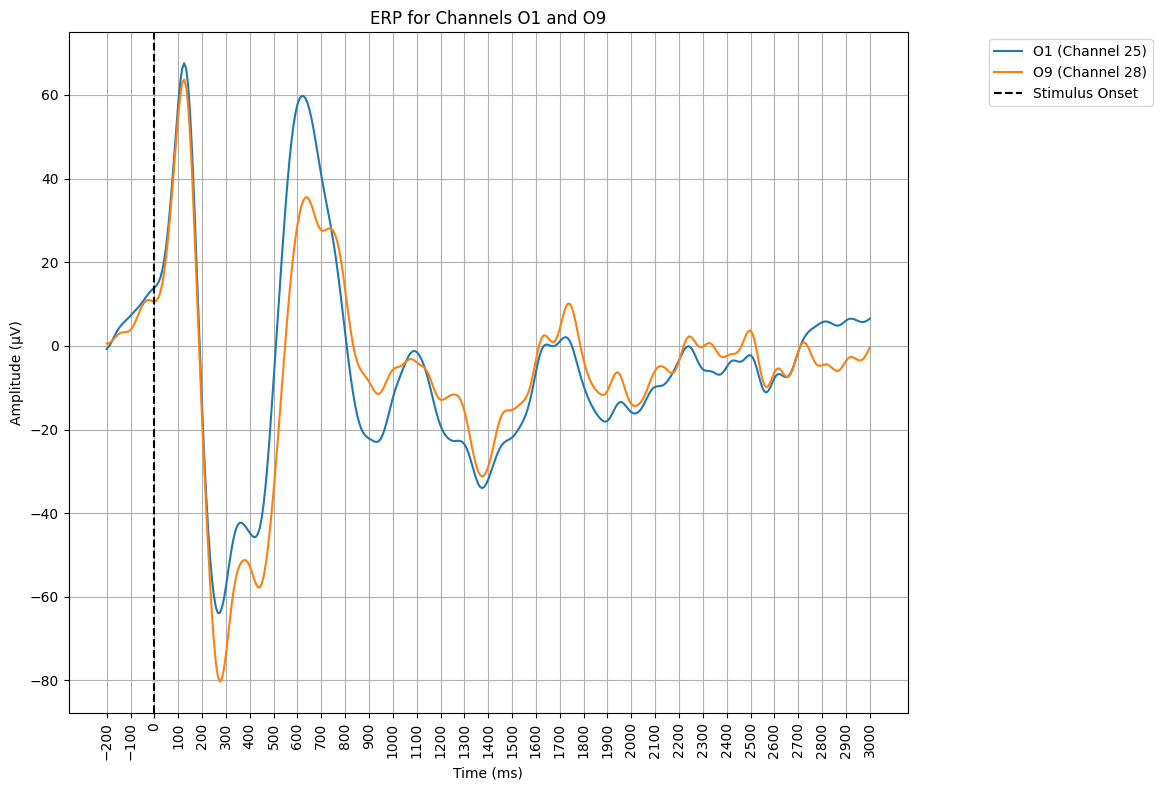

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Path to the .mat file of a specific participant
file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'  # Adjust the path accordingly

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Load ERP data for this specific participant
eeg_data = load_mat_data(file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# Channels to plot (1-based indexing) with corresponding labels
selected_channels = {
    25: "O1",  # Occipital 1
    28: "O9"   # Occipital 9
}

# Convert 1-based indices to 0-based indices for Python
selected_indices = {channel - 1: label for channel, label in selected_channels.items()}

# Plot ERP for the selected channels
plt.figure(figsize=(12, 8))

# Loop through selected channel indices and plot each
for channel_idx, label in selected_indices.items():
    channel_erp = eeg_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, channel_erp, label=f'{label} (Channel {channel_idx + 1})')  # Use original 1-based index in label

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Adjust x-axis scale to show ticks at 100 ms intervals
plt.xticks(np.arange(-200, 3100, 100), rotation=90)  # Set ticks from -200 to 3000 ms and rotate them vertically

# Add labels and title
plt.title("ERP for Channels O1 and O9")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import scipy.io as sio
# import numpy as np

# # Path to the .mat file of a specific participant
# file_path = '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_1.0.mat'  # Adjust the path accordingly

# # Function to load data from a .mat file
# def load_mat_data(file_path):
#     mat_data = sio.loadmat(file_path)
#     print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
#     # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
#     eeg_data = mat_data['average_signal']  # Adjust this key based on your data
#     return eeg_data

# # Load ERP data for this specific participant
# eeg_data = load_mat_data(file_path)

# # Print the shape of the data to understand its structure
# print(f"Shape of the ERP data for this participant: {eeg_data.shape}")

# # Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
# time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

# # Channels to plot (1-based indexing) with corresponding labels
# selected_channels = {
#     25: "O1",  # Occipital 1
#     28: "O9"   # Occipital 9
# }

# # Convert 1-based indices to 0-based indices for Python
# selected_indices = {channel - 1: label for channel, label in selected_channels.items()}

# # Plot ERP for the selected channels
# plt.figure(figsize=(12, 8))

# # Loop through selected channel indices and plot each
# for channel_idx, label in selected_indices.items():
#     channel_erp = eeg_data[channel_idx, :]  # Extract ERP for the current channel
#     plt.plot(time_vector, channel_erp, label=f'{label} (Channel {channel_idx + 1})')  # Use original 1-based index in label

# # Add stimulus onset line at 0 ms
# plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# # Adjust x-axis scale to show ticks at 100 ms intervals
# plt.xticks(np.arange(-200, 3100, 100), rotation=90)  # Set ticks from -200 to 3000 ms and rotate them vertically

# # Add labels and title
# plt.title("ERP for Channels O1 and O9")
# plt.xlabel("Time (ms)")
# plt.ylabel("Amplitude (µV)")
# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Place the legend outside the plot
# plt.grid(True)
# plt.tight_layout()  # Adjust layout to prevent clipping
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_1.0.mat'

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Paths to the .mat files for control and ADHD participants
control_file_path = '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_1.0.mat'
adhd_file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_1.0.mat'

# Load ERP data for control and ADHD participants
control_data = load_mat_data(control_file_path)
adhd_data = load_mat_data(adhd_file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for control participant: {control_data.shape}")
print(f"Shape of the ERP data for ADHD participant: {adhd_data.shape}")

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, control_data.shape[1])  # Adjust according to your data

# Channels to plot (1-based indexing) with corresponding labels
selected_channels = {
    25: "O1",  # Occipital 1
    28: "O9"   # Occipital 9
}

# Convert 1-based indices to 0-based indices for Python
selected_indices = {channel - 1: label for channel, label in selected_channels.items()}

# Plot ERP for the selected channels from both participants
plt.figure(figsize=(12, 8))

# Loop through selected channel indices and plot each
for channel_idx, label in selected_indices.items():
    # Control group participant
    control_erp = control_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, control_erp, label=f'Control {label} (Channel {channel_idx + 1})', linestyle='-', color='blue')

    # ADHD participant
    adhd_erp = adhd_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, adhd_erp, label=f'ADHD {label} (Channel {channel_idx + 1})', linestyle='--', color='red')

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Adjust x-axis scale to show ticks at 100 ms intervals
plt.xticks(np.arange(-200, 3100, 100), rotation=90)  # Set ticks from -200 to 3000 ms and rotate them vertically

# Add labels and title
plt.title("Comparison of ERP for Channels O1 and O9 (Control vs ADHD)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_1.0.mat'

In [ ]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    # Assuming the data for ERP is under the key 'average_signal' (adjust this key based on your data structure)
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Paths to the .mat files for control and ADHD participants
control_file_path = '/content/drive/MyDrive/EEG_dataset/CONTROL_ERPs/average_signal_participant_control_2.0.mat'
adhd_file_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/average_signal_participant_2.0.mat'

# Load ERP data for control and ADHD participants
control_data = load_mat_data(control_file_path)
adhd_data = load_mat_data(adhd_file_path)

# Print the shape of the data to understand its structure
print(f"Shape of the ERP data for control participant: {control_data.shape}")
print(f"Shape of the ERP data for ADHD participant: {adhd_data.shape}")

# Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
time_vector = np.linspace(-200, 3000, control_data.shape[1])  # Adjust according to your data

# Channels to plot (1-based indexing) with corresponding labels
selected_channels = {
    25: "O1",  # Occipital 1
    28: "O9"   # Occipital 9
}

# Convert 1-based indices to 0-based indices for Python
selected_indices = {channel - 1: label for channel, label in selected_channels.items()}

# Plot ERP for the selected channels from both participants
plt.figure(figsize=(12, 8))

# Loop through selected channel indices and plot each
for channel_idx, label in selected_indices.items():
    # Control group participant
    control_erp = control_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, control_erp, label=f'Control {label} (Channel {channel_idx + 1})', linestyle='-', color='blue')

    # ADHD participant
    adhd_erp = adhd_data[channel_idx, :]  # Extract ERP for the current channel
    plt.plot(time_vector, adhd_erp, label=f'ADHD {label} (Channel {channel_idx + 1})', linestyle='--', color='red')

# Add stimulus onset line at 0 ms
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')

# Adjust x-axis scale to show ticks at 100 ms intervals
plt.xticks(np.arange(-200, 3100, 100), rotation=90)  # Set ticks from -200 to 3000 ms and rotate them vertically

# Add labels and title
plt.title("Comparison of ERP for Channels O1 and O9 (Control vs ADHD)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
import os  # Add this import to use os.listdir
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Function to load data from a .mat file
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    print(f"Keys in the file: {mat_data.keys()}")  # Print the keys to inspect the data structure
    eeg_data = mat_data['average_signal']  # Adjust this key based on your data
    return eeg_data

# Function to extract ERP components
def extract_erp_components(eeg_data, channel_idx, time_vector):
    # Get ERP for the selected channel
    erp_signal = eeg_data[channel_idx, :]

    # Define time windows for each component (in ms)
    windows = {
        'N1': (100, 150),  # N1 typically occurs between 100-150 ms
        'P1': (100, 200),  # P1 typically occurs between 100-200 ms
        'P2': (200, 300),  # P2 typically occurs between 200-300 ms
        'P300': (300, 600) # P300 typically occurs between 300-600 ms
    }

    components = {}
    for component, (start_time, end_time) in windows.items():
        # Find the indices corresponding to the time window
        start_idx = np.searchsorted(time_vector, start_time)
        end_idx = np.searchsorted(time_vector, end_time)

        # Extract the signal for the given time window
        window_signal = erp_signal[start_idx:end_idx]
        window_time = time_vector[start_idx:end_idx]

        # Find the peak (maximum or minimum) in the specified window
        if component in ['P1', 'P2', 'P300']:  # Positive peaks
            peak_idx = np.argmax(window_signal)
        elif component == 'N1':  # Negative peak
            peak_idx = np.argmin(window_signal)

        # Store the peak value and latency
        peak_amplitude = window_signal[peak_idx]
        peak_latency = window_time[peak_idx]
        components[component] = (peak_amplitude, peak_latency)

    return components

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 or O9, based on your earlier code)
        selected_channels = {
            25: "O1",  # Occipital 1
            28: "O9"   # Occipital 9
        }

        # Convert 1-based indices to 0-based indices for Python
        selected_indices = {channel - 1: label for channel, label in selected_channels.items()}

        # Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Loop through selected channel indices and extract ERP components
        for channel_idx, label in selected_indices.items():
            components = extract_erp_components(eeg_data, channel_idx, time_vector)
            print(f"Components for {label} (Channel {channel_idx + 1}): {components}")

            # Optionally, plot the ERP for visual inspection
            plt.plot(time_vector, eeg_data[channel_idx, :], label=f'{label} (Channel {channel_idx + 1})')
            plt.title(f"ERP for Channel {label} - {filename}")
            plt.xlabel("Time (ms)")
            plt.ylabel("Amplitude (µV)")
            plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
            plt.legend()
            plt.grid(True)
            plt.show()


In [ ]:
# Function to extract ERP components from the average of two channels
def extract_erp_components_avg_channels(eeg_data, channel_indices, time_vector):
    # Get ERP for the selected channels and average them
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time windows for each component (in ms)
    windows = {
        'N1': (100, 150),  # N1 typically occurs between 100-150 ms
        'P1': (100, 200),  # P1 typically occurs between 100-200 ms
        'P2': (200, 300),  # P2 typically occurs between 200-300 ms
        'P300': (300, 600) # P300 typically occurs between 300-600 ms
    }

    components = {}
    for component, (start_time, end_time) in windows.items():
        # Find the indices corresponding to the time window
        start_idx = np.searchsorted(time_vector, start_time)
        end_idx = np.searchsorted(time_vector, end_time)

        # Extract the signal for the given time window
        window_signal = avg_erp_signal[start_idx:end_idx]
        window_time = time_vector[start_idx:end_idx]

        # Find the peak (maximum or minimum) in the specified window
        if component in ['P1', 'P2', 'P300']:  # Positive peaks
            peak_idx = np.argmax(window_signal)
        elif component == 'N1':  # Negative peak
            peak_idx = np.argmin(window_signal)

        # Store the peak value and latency
        peak_amplitude = window_signal[peak_idx]
        peak_latency = window_time[peak_idx]
        components[component] = (peak_amplitude, peak_latency)

    return components

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 and O9)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing (O1=25, O9=28)

        # Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract ERP components from the average of the selected channels
        components = extract_erp_components_avg_channels(eeg_data, selected_channels, time_vector)
        print(f"Components for {filename}: {components}")

        # Optionally, plot the ERP for visual inspection
        avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in selected_channels], axis=0)
        plt.plot(time_vector, avg_erp_signal, label=f'Average ERP for {filename}')
        plt.title(f"ERP for Average of O1 and O9 - {filename}")
        plt.xlabel("Time (ms)")
        plt.ylabel("Amplitude (µV)")
        plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
import numpy as np

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract ERP components from the average of two channels
def extract_erp_components_avg_channels(eeg_data, channel_indices, time_vector):
    # Get ERP for the selected channels and average them
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time windows for each component (in ms)
    windows = {
        'N1': (100, 150),  # N1 typically occurs between 100-150 ms
        'P1': (100, 200),  # P1 typically occurs between 100-200 ms
        'P2': (200, 300),  # P2 typically occurs between 200-300 ms
        'P300': (300, 600) # P300 typically occurs between 300-600 ms
    }

    components = {}
    amplitudes = []  # List to store amplitude values for normalization
    latencies = []  # List to store latency values for normalization

    # Extract ERP components and store their amplitude and latency
    for component, (start_time, end_time) in windows.items():
        # Find the indices corresponding to the time window
        start_idx = np.searchsorted(time_vector, start_time)
        end_idx = np.searchsorted(time_vector, end_time)

        # Extract the signal for the given time window
        window_signal = avg_erp_signal[start_idx:end_idx]
        window_time = time_vector[start_idx:end_idx]

        # Find the peak (maximum or minimum) in the specified window
        if component in ['P1', 'P2', 'P300']:  # Positive peaks
            peak_idx = np.argmax(window_signal)
        elif component == 'N1':  # Negative peak
            peak_idx = np.argmin(window_signal)

        # Store the peak value and latency
        peak_amplitude = window_signal[peak_idx]
        peak_latency = window_time[peak_idx]

        # Append values to the lists for normalization
        amplitudes.append(peak_amplitude)
        latencies.append(peak_latency)

        components[component] = (peak_amplitude, peak_latency)

    # Normalize both amplitude and latency
    normalized_amplitudes = z_score_normalize(np.array(amplitudes))
    normalized_latencies = z_score_normalize(np.array(latencies))

    # Update components with normalized values
    for idx, component in enumerate(components.keys()):
        amplitude, latency = components[component]
        components[component] = (normalized_amplitudes[idx], normalized_latencies[idx])

    return components

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 and O9)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing (O1=25, O9=28)

        # Create a time vector for plotting (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract ERP components from the average of the selected channels
        components = extract_erp_components_avg_channels(eeg_data, selected_channels, time_vector)
        print(f"Normalized Components for {filename}: {components}")

        # Optionally, plot the ERP for visual inspection
        avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in selected_channels], axis=0)
        plt.plot(time_vector, avg_erp_signal, label=f'Average ERP for {filename}')
        plt.title(f"ERP for Average of O1 and O9 - {filename}")
        plt.xlabel("Time (ms)")
        plt.ylabel("Amplitude (µV)")
        plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
import os
import scipy.io as sio

# Path to the directory containing the ERP files
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs'

# Function to load data from a .mat file and print the keys
def load_mat_data(file_path):
    mat_data = sio.loadmat(file_path)
    # Print the keys to inspect the structure of the data
    print(f"Keys in the file {file_path}: {mat_data.keys()}")
    return mat_data

# List all .mat files in the folder
file_names = [f for f in os.listdir(folder_path) if f.endswith('.mat')]

# Load data for each participant and inspect the keys
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    mat_data = load_mat_data(file_path)
    # You can now manually check the keys to find the correct one for EEG data


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract ERP components from the average of two channels
def extract_erp_components_avg_channels(eeg_data, channel_indices, time_vector):
    # Get ERP for the selected channels and average them
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time windows for each component (in ms)
    windows = {
        'N1': (100, 150),  # N1 typically occurs between 100-150 ms
        'P1': (100, 200),  # P1 typically occurs between 100-200 ms
        'P2': (200, 300),  # P2 typically occurs between 200-300 ms
        'P300': (300, 600) # P300 typically occurs between 300-600 ms
    }

    components = {}
    amplitudes = []  # List to store amplitude values for normalization
    latencies = []  # List to store latency values for normalization

    # Extract ERP components and store their amplitude and latency
    for component, (start_time, end_time) in windows.items():
        # Find the indices corresponding to the time window
        start_idx = np.searchsorted(time_vector, start_time)
        end_idx = np.searchsorted(time_vector, end_time)

        # Extract the signal for the given time window
        window_signal = avg_erp_signal[start_idx:end_idx]
        window_time = time_vector[start_idx:end_idx]

        # Find the peak (maximum or minimum) in the specified window
        if component in ['P1', 'P2', 'P300']:  # Positive peaks
            peak_idx = np.argmax(window_signal)
        elif component == 'N1':  # Negative peak
            peak_idx = np.argmin(window_signal)

        # Store the peak value and latency
        peak_amplitude = window_signal[peak_idx]
        peak_latency = window_time[peak_idx]

        # Append values to the lists for normalization
        amplitudes.append(peak_amplitude)
        latencies.append(peak_latency)

        components[component] = (peak_amplitude, peak_latency)

    # Normalize both amplitude and latency
    normalized_amplitudes = z_score_normalize(np.array(amplitudes))
    normalized_latencies = z_score_normalize(np.array(latencies))

    # Update components with normalized values
    for idx, component in enumerate(components.keys()):
        amplitude, latency = components[component]
        components[component] = (normalized_amplitudes[idx], normalized_latencies[idx])

    return components

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'eeg_data' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 and O9)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing (O1=25, O9=28)

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract ERP components from the average of the selected channels
        components = extract_erp_components_avg_channels(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: normalized amplitudes and latencies
        feature_vector = []
        for component in ['N1', 'P1', 'P2', 'P300']:
            amplitude, latency = components[component]
            feature_vector.extend([amplitude, latency])  # Add both amplitude and latency

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Print the shape of the feature matrix (for verification)
print("Feature Matrix Shape:", feature_matrix.shape)


Feature Matrix Shape: (48, 8)


In [ ]:
# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Print the shape of the feature matrix (for verification)
print("Feature Matrix Shape:", feature_matrix.shape)

# Print the feature matrix itself
print("Feature Matrix:")
print(feature_matrix)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to plot the Elbow Method
def plot_elbow_method(feature_matrix):
    inertias = []  # To store inertia values for each number of clusters
    max_clusters = 10  # Set the maximum number of clusters to try

    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(feature_matrix)
        inertias.append(kmeans.inertia_)

    # Plot the inertia values for each cluster number
    plt.plot(range(1, max_clusters+1), inertias, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()

# Call the function to plot the Elbow Method
plot_elbow_method(feature_matrix)


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Example feature matrix (replace with your actual feature matrix)
# Assuming 'feature_matrix' is a NumPy array of shape (n_samples, n_features)
# where each row represents a data point and each column represents a feature
# feature_matrix = np.array(...)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples as needed
dbscan.fit(feature_matrix)

# Get the cluster labels
labels = dbscan.labels_

# Print the number of clusters and the number of noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Optionally, you can plot the clusters if your data is 2D
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'feature_matrix' is a NumPy array with your data
# Example: Create a sample 2D feature matrix for demonstration
# feature_matrix = np.array(...)  # Replace with your actual feature matrix

# Initialize KMeans with k=3 (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the feature matrix
kmeans.fit(feature_matrix)

# Get the cluster labels (each point's assigned cluster)
labels = kmeans.labels_

# Get the cluster centers (the centroids of the clusters)
centroids = kmeans.cluster_centers_

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))

# Print the cluster centers (centroids)
print("Cluster centers (centroids):\n", centroids)

# Check if the feature matrix is 2D for visualization
if feature_matrix.shape[1] == 2:
    # Plot the clusters in 2D
    plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')  # Red X for centroids
    plt.title('K-Means Clustering (k=3)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()  # This line ensures the plot is displayed

else:
    print("Data is not 2D. Unable to plot in 2D.")


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'feature_matrix' is a NumPy array with your data

# Initialize KMeans with k=3 (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the feature matrix
kmeans.fit(feature_matrix)

# Get the cluster labels (each point's assigned cluster)
labels = kmeans.labels_

# Get the cluster centers (the centroids of the clusters)
centroids = kmeans.cluster_centers_

# Apply PCA to reduce the feature matrix to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(feature_matrix)

# Plot the reduced data with clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')  # Red X for centroids
plt.title('K-Means Clustering (k=3) - PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming feature_matrix is your input data

# Step 1: Apply PCA to reduce dimensions (e.g., reducing to 2 dimensions)
pca = PCA(n_components=2)  # You can adjust n_components as needed
reduced_data = pca.fit_transform(feature_matrix)

# Step 2: Apply DBSCAN to the reduced data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(reduced_data)

# Step 3: Visualize the results (clusters in 2D)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print cluster labels
print("DBSCAN labels:", dbscan_labels)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming feature_matrix is your input data

# Step 1: Apply PCA to reduce dimensions (e.g., reducing to 2 dimensions)
pca = PCA(n_components=2)  # You can adjust n_components as needed
reduced_data = pca.fit_transform(feature_matrix)

# Step 2: Define a function to apply DBSCAN and plot the results
def plot_dbscan_clusters(eps_value, min_samples_value):
    # Apply DBSCAN with specific eps and min_samples
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    dbscan_labels = dbscan.fit_predict(reduced_data)

    # Plot the results (clusters in 2D)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', s=50, edgecolor='k')
    plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Step 3: Call the function with different eps and min_samples values to plot for different cluster numbers
# These parameters impact the number of clusters (and noise points)
plot_dbscan_clusters(eps_value=0.5, min_samples_value=5)   # Adjust as needed for 4 clusters
plot_dbscan_clusters(eps_value=0.6, min_samples_value=5)   # Adjust as needed for 5 clusters
plot_dbscan_clusters(eps_value=0.7, min_samples_value=5)   # Adjust as needed for 6 clusters

# Optionally, print out the labels to inspect the cluster distribution
print("DBSCAN labels for eps=0.5, min_samples=5:", dbscan_labels)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'feature_matrix' is a NumPy array with your data

# Function to perform K-Means and plot the results
def plot_kmeans_clusters(n_clusters, feature_matrix):
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the feature matrix
    kmeans.fit(feature_matrix)

    # Get the cluster labels (each point's assigned cluster)
    labels = kmeans.labels_

    # Get the cluster centers (the centroids of the clusters)
    centroids = kmeans.cluster_centers_

    # Apply PCA to reduce the feature matrix to 2D for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(feature_matrix)

    # Plot the reduced data with clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')  # Red X for centroids
    plt.title(f'K-Means Clustering (k={n_clusters}) - PCA Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Plot for 4 clusters
plot_kmeans_clusters(n_clusters=4, feature_matrix=feature_matrix)

# Plot for 5 clusters
plot_kmeans_clusters(n_clusters=5, feature_matrix=feature_matrix)

# Plot for 6 clusters
plot_kmeans_clusters(n_clusters=6, feature_matrix=feature_matrix)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P300 component (Amplitude and Latency)
def extract_p300_component(eeg_data, channel_indices, time_vector):
    # Get the ERP for the selected channels and average them
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time window for P300 (300-600 ms)
    start_time = 300  # P300 typically occurs between 300-600 ms
    end_time = 600

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the positive peak in the specified window (P300)
    peak_idx = np.argmax(window_signal)  # Positive peak

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 and O9)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing (O1=25, O9=28)

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract P300 component from the average of the selected channels
        p300_amplitude, p300_latency = extract_p300_component(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: normalized amplitude and latency
        feature_vector = [p300_amplitude, p300_latency]  # Add both amplitude and latency

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform K-Means clustering on the normalized feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize the clusters in 2D (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering (k=3) - P300 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print cluster labels
print("K-Means Cluster Labels:", kmeans_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P1 component (Amplitude and Latency)
def extract_p1_component(eeg_data, channel_indices, time_vector):
    # Get the ERP for the selected channels and average them
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time window for P1 (100-200 ms)
    start_time = 100  # P1 typically occurs between 100-200 ms
    end_time = 200

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the positive peak in the specified window (P1)
    peak_idx = np.argmax(window_signal)  # Positive peak

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 and O9)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing (O1=25, O9=28)

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract P1 component from the average of the selected channels
        p1_amplitude, p1_latency = extract_p1_component(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: normalized amplitude and latency
        feature_vector = [p1_amplitude, p1_latency]  # Add both amplitude and latency

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform K-Means clustering on the normalized feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize the clusters in 2D (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering (k=3) - P1 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print cluster labels
print("K-Means Cluster Labels:", kmeans_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P1 component (Amplitude and Latency) from the average of two channels
def extract_p1_component(eeg_data, channel_indices, time_vector):
    # Average the selected channels (e.g., O1 and O9)
    avg_erp_signal = np.mean(eeg_data[channel_indices, :], axis=0)

    # Define time window for P1 (100-200 ms)
    start_time = 100  # P1 typically occurs between 100-200 ms
    end_time = 200

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the positive peak in the specified window (P1)
    peak_idx = np.argmax(window_signal)  # Positive peak

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'  # Update with your folder path

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (O1 and O9, corresponding to indices 24 and 27)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract P1 component from the average of the selected channels
        p1_amplitude, p1_latency = extract_p1_component(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: normalized amplitude and latency
        feature_vector = [p1_amplitude, p1_latency]  # Add both amplitude and latency

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform K-Means clustering on the normalized feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize the clusters in 2D (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering (k=3) - P1 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print cluster labels
print("K-Means Cluster Labels:", kmeans_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P1 component (Amplitude and Latency) from the average of two channels
def extract_p1_component(eeg_data, channel_indices, time_vector):
    # Average the selected channels (e.g., O1 and O9)
    avg_erp_signal = np.mean(eeg_data[channel_indices, :], axis=0)

    # Define time window for P1 (100-200 ms)
    start_time = 100  # P1 typically occurs between 100-200 ms
    end_time = 200

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the positive peak in the specified window (P1)
    peak_idx = np.argmax(window_signal)  # Positive peak

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'  # Update with your folder path

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (O1 and O9, corresponding to indices 24 and 27)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract P1 component from the average of the selected channels
        p1_amplitude, p1_latency = extract_p1_component(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: normalized amplitude and latency
        feature_vector = [p1_amplitude, p1_latency]  # Add both amplitude and latency

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform DBSCAN clustering on the normalized feature matrix
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as necessary
dbscan_labels = dbscan.fit_predict(normalized_feature_matrix)

# Visualize the clusters in 2D (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

# Plot clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', marker='o', s=100)
plt.title('DBSCAN Clustering - P1 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print DBSCAN cluster labels
print("DBSCAN Cluster Labels:", dbscan_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract N1 component (Amplitude and Latency) from the average of two channels
def extract_n1_component(eeg_data, channel_indices, time_vector):
    # Average the selected channels (e.g., O1 and O9)
    avg_erp_signal = np.mean(eeg_data[channel_indices, :], axis=0)

    # Define time window for N1 (80-120 ms)
    start_time = 80  # N1 typically occurs between 80-120 ms
    end_time = 120

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the negative peak in the specified window (N1)
    peak_idx = np.argmin(window_signal)  # Negative peak

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'  # Update with your folder path

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (O1 and O9, corresponding to indices 24 and 27)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract N1 component from the average of the selected channels
        n1_amplitude, n1_latency = extract_n1_component(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: normalized amplitude and latency
        feature_vector = [n1_amplitude, n1_latency]  # Add both amplitude and latency

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform K-Means clustering on the normalized feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize the clusters in 2D (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering (k=3) - N1 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print cluster labels
print("K-Means Cluster Labels:", kmeans_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract a component (Amplitude and Latency) given a time window
def extract_component(eeg_data, channel_indices, time_vector, start_time, end_time, is_positive_peak=True):
    # Average the selected channels (e.g., O1 and O9)
    avg_erp_signal = np.mean(eeg_data[channel_indices, :], axis=0)

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the peak in the specified window (positive for P1, negative for N1)
    if is_positive_peak:
        peak_idx = np.argmax(window_signal)  # Positive peak (P1)
    else:
        peak_idx = np.argmin(window_signal)  # Negative peak (N1)

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'  # Update with your folder path

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (O1 and O9, corresponding to indices 24 and 27)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract P1 component (positive peak) in the time window 100-150 ms
        p1_amplitude, p1_latency = extract_component(eeg_data, selected_channels, time_vector, 100, 150, is_positive_peak=True)

        # Extract N1 component (negative peak) in the time window 80-120 ms
        n1_amplitude, n1_latency = extract_component(eeg_data, selected_channels, time_vector, 80, 120, is_positive_peak=False)

        # Create a feature vector for this participant: normalized amplitude and latency for P1 and N1
        feature_vector = [p1_amplitude, p1_latency, n1_amplitude, n1_latency]

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform K-Means clustering on the normalized feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize the clusters in 2D (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering (k=3) - P1 and N1 Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print cluster labels
print("K-Means Cluster Labels:", kmeans_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract a specified ERP component (Amplitude and Latency)
def extract_component(eeg_data, channel_indices, time_vector, start_time, end_time, is_positive_peak=True):
    # Average the selected channels (e.g., O1 and O9)
    avg_erp_signal = np.mean(eeg_data[channel_indices, :], axis=0)

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the peak (positive or negative) in the specified window
    if is_positive_peak:
        peak_idx = np.argmax(window_signal)  # Positive peak
    else:
        peak_idx = np.argmin(window_signal)  # Negative peak

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'  # Update with your folder path

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 and O9, corresponding to indices 24 and 27)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract P2 component (200-300 ms, positive peak)
        p2_amplitude, p2_latency = extract_component(
            eeg_data, selected_channels, time_vector, start_time=200, end_time=300, is_positive_peak=True
        )

        # Create a feature vector for this participant: P2 amplitude and latency
        feature_vector = [p2_amplitude, p2_latency]

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform K-Means clustering on the normalized feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize the clusters in 2D (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering (k=3) - P2 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print cluster labels
print("K-Means Cluster Labels:", kmeans_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P300 component (Amplitude and Latency)
def extract_p300_component(eeg_data, channel_indices, time_vector):
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time window for P300 (300-600 ms)
    start_time = 300
    end_time = 600

    # Find indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the positive peak in the specified window (P300)
    peak_idx = np.argmax(window_signal)

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    mat_data = scipy.io.loadmat(file_path)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key
    return eeg_data

# Prepare feature matrix for all participants
all_features = []
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over participant files and extract P300 features
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(folder_path, filename)
        eeg_data = load_mat_data(file_path)
        selected_channels = [24, 27]
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])
        p300_amplitude, p300_latency = extract_p300_component(eeg_data, selected_channels, time_vector)
        feature_vector = [p300_amplitude, p300_latency]
        all_features.append(feature_vector)

# Convert to NumPy array and normalize
feature_matrix = np.array(all_features)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Find the optimal number of clusters
range_n_clusters = range(2, 10)
inertia_values = []
silhouette_scores = []
davies_bouldin_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_feature_matrix)

    # Inertia (for Elbow Method)
    inertia_values.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg = silhouette_score(normalized_feature_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(normalized_feature_matrix, cluster_labels)
    davies_bouldin_values.append(db_score)

# Plot Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, davies_bouldin_values, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

# Select the optimal number of clusters based on Elbow Method or highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters (based on Silhouette Score): {optimal_n_clusters}")

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
final_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize final clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_labels, cmap='viridis', marker='o', s=100)
plt.title(f'K-Means Clustering (k={optimal_n_clusters}) - P300 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print final cluster labels
print("Final Cluster Labels:", final_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P2 and P3 components (Amplitude and Latency)
def extract_p2_p3_components(eeg_data, channel_indices, time_vector):
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time window for P2 (200-300 ms) and P3 (400-700 ms)
    p2_start_time = 200
    p2_end_time = 300
    p3_start_time = 400
    p3_end_time = 700

    # Find indices corresponding to the time windows
    p2_start_idx = np.searchsorted(time_vector, p2_start_time)
    p2_end_idx = np.searchsorted(time_vector, p2_end_time)
    p3_start_idx = np.searchsorted(time_vector, p3_start_time)
    p3_end_idx = np.searchsorted(time_vector, p3_end_time)

    # Extract signal for the given time windows
    p2_window_signal = avg_erp_signal[p2_start_idx:p2_end_idx]
    p3_window_signal = avg_erp_signal[p3_start_idx:p3_end_idx]
    p2_window_time = time_vector[p2_start_idx:p2_end_idx]
    p3_window_time = time_vector[p3_start_idx:p3_end_idx]

    # Find the positive peaks in the specified windows (P2 and P3)
    p2_peak_idx = np.argmax(p2_window_signal)
    p3_peak_idx = np.argmax(p3_window_signal)

    # Store the peak amplitude and latency for both P2 and P3
    p2_amplitude = p2_window_signal[p2_peak_idx]
    p2_latency = p2_window_time[p2_peak_idx]

    p3_amplitude = p3_window_signal[p3_peak_idx]
    p3_latency = p3_window_time[p3_peak_idx]

    return p2_amplitude, p2_latency, p3_amplitude, p3_latency

# Function to load .mat files
def load_mat_data(file_path):
    mat_data = scipy.io.loadmat(file_path)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key
    return eeg_data

# Prepare feature matrix for all participants
all_features = []
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over participant files and extract P2 and P3 features
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(folder_path, filename)
        eeg_data = load_mat_data(file_path)
        selected_channels = [24, 27]  # Example: channels O1 and O9
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])

        # Extract P2 and P3 components (amplitude and latency)
        p2_amplitude, p2_latency, p3_amplitude, p3_latency = extract_p2_p3_components(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: P2 amplitude, P2 latency, P3 amplitude, P3 latency
        feature_vector = [p2_amplitude, p2_latency, p3_amplitude, p3_latency]
        all_features.append(feature_vector)

# Convert to NumPy array and normalize
feature_matrix = np.array(all_features)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Find the optimal number of clusters
range_n_clusters = range(2, 10)
inertia_values = []
silhouette_scores = []
davies_bouldin_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_feature_matrix)

    # Inertia (for Elbow Method)
    inertia_values.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg = silhouette_score(normalized_feature_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(normalized_feature_matrix, cluster_labels)
    davies_bouldin_values.append(db_score)

# Plot Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, davies_bouldin_values, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

# Select the optimal number of clusters based on Elbow Method or highest silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters (based on Silhouette Score): {optimal_n_clusters}")

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
final_labels = kmeans.fit_predict(normalized_feature_matrix)

# Visualize final clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_labels, cmap='viridis', marker='o', s=100)
plt.title(f'K-Means Clustering (k={optimal_n_clusters}) - P2 and P3 Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print final cluster labels
print("Final Cluster Labels:", final_labels)


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P2 and P3 components (Amplitude and Latency)
def extract_p2_p3_components(eeg_data, channel_indices, time_vector):
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time window for P2 (200-300 ms) and P3 (400-700 ms)
    p2_start_time = 200
    p2_end_time = 300
    p3_start_time = 400
    p3_end_time = 700

    # Find indices corresponding to the time windows
    p2_start_idx = np.searchsorted(time_vector, p2_start_time)
    p2_end_idx = np.searchsorted(time_vector, p2_end_time)
    p3_start_idx = np.searchsorted(time_vector, p3_start_time)
    p3_end_idx = np.searchsorted(time_vector, p3_end_time)

    # Extract signal for the given time windows
    p2_window_signal = avg_erp_signal[p2_start_idx:p2_end_idx]
    p3_window_signal = avg_erp_signal[p3_start_idx:p3_end_idx]
    p2_window_time = time_vector[p2_start_idx:p2_end_idx]
    p3_window_time = time_vector[p3_start_idx:p3_end_idx]

    # Find the positive peaks in the specified windows (P2 and P3)
    p2_peak_idx = np.argmax(p2_window_signal)
    p3_peak_idx = np.argmax(p3_window_signal)

    # Store the peak amplitude and latency for both P2 and P3
    p2_amplitude = p2_window_signal[p2_peak_idx]
    p2_latency = p2_window_time[p2_peak_idx]

    p3_amplitude = p3_window_signal[p3_peak_idx]
    p3_latency = p3_window_time[p3_peak_idx]

    return p2_amplitude, p2_latency, p3_amplitude, p3_latency

# Function to load .mat files
def load_mat_data(file_path):
    mat_data = scipy.io.loadmat(file_path)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key
    return eeg_data

# Prepare feature matrix for all participants
all_features = []
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over participant files and extract P2 and P3 features
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(folder_path, filename)
        eeg_data = load_mat_data(file_path)
        selected_channels = [24, 27]  # Example: channels O1 and O9
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])

        # Extract P2 and P3 components (amplitude and latency)
        p2_amplitude, p2_latency, p3_amplitude, p3_latency = extract_p2_p3_components(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: P2 amplitude, P2 latency, P3 amplitude, P3 latency
        feature_vector = [p2_amplitude, p2_latency, p3_amplitude, p3_latency]
        all_features.append(feature_vector)

# Convert to NumPy array and normalize
feature_matrix = np.array(all_features)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples based on the data
final_labels = dbscan.fit_predict(normalized_feature_matrix)

# Visualize final clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_labels, cmap='viridis', marker='o', s=100)
plt.title('DBSCAN Clustering - P2 and P3 Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print final cluster labels
print("Final Cluster Labels:", final_labels)

# Optionally, evaluate clustering using Silhouette Score and Davies-Bouldin Index
# We can ignore noise points (label = -1) in these evaluations
if len(set(final_labels)) > 1:  # Ensure there is more than one cluster
    silhouette_avg = silhouette_score(normalized_feature_matrix, final_labels)
    print(f"Silhouette Score: {silhouette_avg}")

    db_score = davies_bouldin_score(normalized_feature_matrix, final_labels)
    print(f"Davies-Bouldin Score: {db_score}")


In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P300 component (Amplitude and Latency)
def extract_p300_component(eeg_data, channel_indices, time_vector):
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time window for P300 (300-600 ms)
    start_time = 300
    end_time = 600

    # Find indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the positive peak in the specified window (P300)
    peak_idx = np.argmax(window_signal)

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    mat_data = scipy.io.loadmat(file_path)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key
    return eeg_data

# Prepare feature matrix for all participants
all_features = []
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over participant files and extract P300 features
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        file_path = os.path.join(folder_path, filename)
        eeg_data = load_mat_data(file_path)
        selected_channels = [24, 27]
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])
        p300_amplitude, p300_latency = extract_p300_component(eeg_data, selected_channels, time_vector)
        feature_vector = [p300_amplitude, p300_latency]
        all_features.append(feature_vector)

# Convert to NumPy array and normalize
feature_matrix = np.array(all_features)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform DBSCAN clustering
# Set DBSCAN parameters
eps = 0.5  # Max distance between two points to be considered neighbors
min_samples = 5  # Minimum number of points required to form a dense region (cluster)

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(normalized_feature_matrix)

# Evaluate the clustering performance
# Note: DBSCAN can label some points as noise, so ignore points with label -1
valid_labels = cluster_labels != -1
valid_data = normalized_feature_matrix[valid_labels]

# Silhouette Score (only valid points)
if len(set(cluster_labels[valid_labels])) > 1:
    silhouette_avg = silhouette_score(valid_data, cluster_labels[valid_labels])
else:
    silhouette_avg = -1  # If only one cluster is found, silhouette score is undefined
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index (only valid points)
db_score = davies_bouldin_score(valid_data, cluster_labels[valid_labels])
print(f"Davies-Bouldin Index: {db_score}")

# Visualize final clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_feature_matrix)

# Plot DBSCAN clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=100)
plt.title(f'DBSCAN Clustering - P300 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Filter out noise points (label -1)
valid_labels = cluster_labels[cluster_labels != -1]
valid_data = reduced_data[cluster_labels != -1]

# Plot only the valid clusters (excluding noise)
plt.scatter(valid_data[:, 0], valid_data[:, 1], c=valid_labels, cmap='viridis', marker='o', s=100)
plt.title(f'DBSCAN Clustering (without Noise) - P300 Component')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print final cluster labels (ignoring noise labeled as -1)
print("Final Cluster Labels:", cluster_labels)


Normalized Feature Matrix Shape: (48, 2)


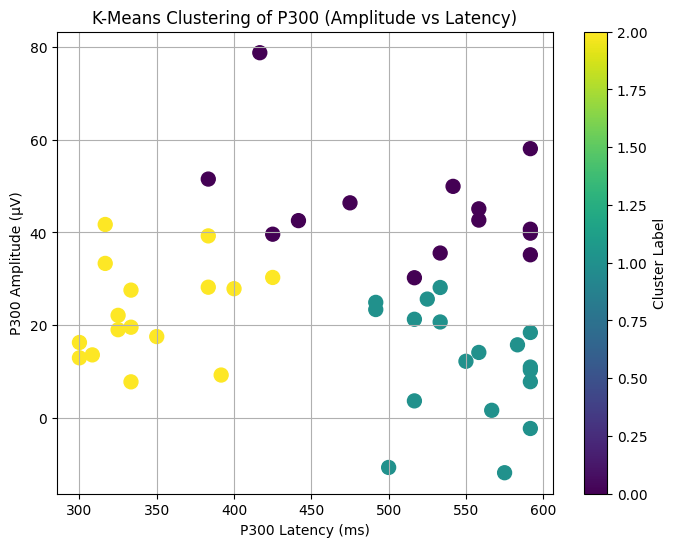

In [ ]:
import numpy as np
import os
import scipy.io  # Required for loading .mat files
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to normalize data using Z-score normalization
def z_score_normalize(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    return (data - mean_val) / std_val

# Function to extract P300 component (Amplitude and Latency)
def extract_p300_component(eeg_data, channel_indices, time_vector):
    # Get the ERP for the selected channels and average them
    avg_erp_signal = np.mean([eeg_data[channel_idx, :] for channel_idx in channel_indices], axis=0)

    # Define time window for P300 (300-600 ms)
    start_time = 300  # P300 typically occurs between 300-600 ms
    end_time = 600

    # Find the indices corresponding to the time window
    start_idx = np.searchsorted(time_vector, start_time)
    end_idx = np.searchsorted(time_vector, end_time)

    # Extract the signal for the given time window
    window_signal = avg_erp_signal[start_idx:end_idx]
    window_time = time_vector[start_idx:end_idx]

    # Find the positive peak in the specified window (P300)
    peak_idx = np.argmax(window_signal)  # Positive peak

    # Store the peak amplitude and latency
    peak_amplitude = window_signal[peak_idx]
    peak_latency = window_time[peak_idx]

    return peak_amplitude, peak_latency

# Function to load .mat files
def load_mat_data(file_path):
    # Load the .mat file
    mat_data = scipy.io.loadmat(file_path)

    # Extract the EEG data (adjust the key depending on your .mat file structure)
    eeg_data = mat_data['average_signal']  # Assuming 'average_signal' is the key in your .mat file

    return eeg_data

# Prepare feature matrix for all participants
all_features = []

# Example usage
folder_path = '/content/drive/MyDrive/EEG_dataset/ADHD_ERPs/'

# Iterate over all participant files in the folder and extract ERP components
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):  # Only process .mat files
        file_path = os.path.join(folder_path, filename)

        # Load ERP data for the participant
        eeg_data = load_mat_data(file_path)

        # Select the channel indices (e.g., O1 and O9)
        selected_channels = [24, 27]  # Adjust based on 0-based indexing (O1=25, O9=28)

        # Create a time vector for the ERP extraction (assuming the data was segmented from -200 ms to 3000 ms)
        time_vector = np.linspace(-200, 3000, eeg_data.shape[1])  # Adjust according to your data

        # Extract P300 component from the average of the selected channels
        p300_amplitude, p300_latency = extract_p300_component(eeg_data, selected_channels, time_vector)

        # Create a feature vector for this participant: normalized amplitude and latency
        feature_vector = [p300_amplitude, p300_latency]  # Add both amplitude and latency

        all_features.append(feature_vector)

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(all_features)

# Normalize the feature matrix (amplitude and latency)
normalized_feature_matrix = np.apply_along_axis(z_score_normalize, 0, feature_matrix)

# Print the shape of the feature matrix (for verification)
print("Normalized Feature Matrix Shape:", normalized_feature_matrix.shape)

# Perform K-Means clustering on the normalized feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_feature_matrix)

# Scatter plot of clusters using original features (P300 Amplitude vs Latency)
plt.figure(figsize=(8, 6))
plt.scatter(feature_matrix[:, 1], feature_matrix[:, 0], c=kmeans_labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering of P300 (Amplitude vs Latency)')
plt.xlabel('P300 Latency (ms)')
plt.ylabel('P300 Amplitude (µV)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

